The simulation has the following objectives:

Train a generative probabilistic model (Restricted Boltzmann Machine) via 2 different ways:


1.   Classical machine learning by means of Markov Chain Monte Carlo through
parallel tempering
2.   Hybrid machine learning by means of MCMC with a final boost of D-Wave´s quantum annealing

The model is trained for the MNIST dataset, i.e., handwritten digits of 28x28 pixel images.
By the moment the project was being carried (year 2022) it was used with chimera topology. Now (10/9/2023) I had to change it to pegasus topology. By the time the project was being carried, D-Wave could only embed images of up to 7x7 pixels, so images had to be reduced and trained with those sizes. Nonetheless, the classical model could handle images of 28x28 pixels. So if you want to see the training of the classical model for 28x28 pixels (dataset_size=28 & classical=True), you can do it, but hybrid training must be 7x7 (dataset_size=7 & classical=False)

The Restricted Boltzmann Machine is later evaluated by a Residual Neural Network of 18 layers with an accuracy of ~94% and ~97% for 7x7 and 28x28 pixels dataset respectively to evaluate the performance of the generative model by two different ways, classical and hybrid machine learning.

Main parameters which you can play:

Number of hidden neurons, Epochs, Training mode (classical or hybrid), learning_rate, dataset_size (number of pixels)

$\textbf{Only last part of the training was used with D-Wave
because for a free account access only gives 1 minute of
sampling, so I had to introduce the annealing at the end of the training}$

This code repository uses my personal token. If my token expires/runs out of time, you need to create your own account and run this code. Otherwise the annealing process won´t be able to be carried.

In [1]:
!git clone https://github.com/AlvaroHuanay/RBM_DWave_project --quiet
!pip install dwave-ocean-sdk --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 32.4 MB/s eta 0:00:00


In [2]:
import os
!pwd

/content


In [3]:
os.chdir("/content/RBM_DWave_project")
!pwd

/content/RBM_DWave_project


Note:

If you want to re-train the models, you have to delete both the .h5 files that contain the parameters of each model after training.

**Classical execution**

Substitute the following variables in:

*   /content/RBM_DWave_project/rbm_generic_dataset_size_example.py




*   classical = True
*   dataset_size = 7
*   epochs = 10

In [18]:
"""
After training the RBM you will see an outcome that states:

Image batch dimensions: torch.Size([128, 1, 7, 7])
Image label dimensions: torch.Size([128])
Epoch: 1 | Batch index: 0 | Batch size: 128
Epoch: 2 | Batch index: 0 | Batch size: 128
Test accuracy: 93.98%

This the evaluation of the ResNet18 for 7x7 MNIST dataset after training.
That is the ResNet18 accuracy (93.98%) to evaluate the generated images of the RBM
"""


!python rbm_generic_dataset_size_example.py

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call

**Hybrid execution**


Introduce the following variables in:

*   /content/RBM_DWave_project/rbm_generic_dataset_size_example.py




*   classical = False
*   dataset_size = 7
*   epochs = 10

In [19]:
!python rbm_generic_dataset_size_example.py

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call

**Classical full information execution (all pixels in dataset)**

Introduce the following variables in:

*   /content/RBM_DWave_project/rbm_generic_dataset_size_example.py

*   classical = True
*   dataset_size = 28
*   epochs = 10

You also must enter in the resnet file and edit:

*   /content/RBM_DWave_project/resnet_example/resnet18_generic_dataset_size_example.py

*   dataset_size = 28

In [20]:
"""
After training the RBM you will see an outcome that states:

Reconstructing images
Epoch: 1 | Batch index: 0 | Batch size: 128
Epoch: 2 | Batch index: 0 | Batch size: 128
Test accuracy: 98.43%

This the evaluation of the ResNet18 for 7x7 MNIST dataset after training.
That is the ResNet18 accuracy (98.43%) to evaluate the generated images of the RBM

"""

!python rbm_generic_dataset_size_example.py

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
torch.Size([28, 28])
torch.Size([60000, 784])
torch.Size([10000, 784])
Epoch 1: 100% 1875/1875 [00:34<00:00, 53.88it/s]
Gap = 0.09761925041675568
New gap element added to the list:  [0.09761925041675568]
Epoch 2: 100% 1875/1875 [00:34<00:00, 53.90it/s]
Gap = 0.21332992613315582
New gap element added to the list:  [0.09761925041675568, 0.21332992613315582]
Epoch 3: 100% 1875/1875 [00:33<00:00, 56.67it/s]
Gap = 0.19567811489105225
New gap element added to the list:  [0.09761925041675568, 0.21332992613315582, 0.19567811489105225]
Epoch 4: 100% 1875/1875 [00:33<00:00, 56.35it/s]
Gap = 0.06437818706035614
New gap element added to the list:  [0.09761925041

Comments:

We can observe that under the same characteristics (1st and 2nd simulation) the RBM performs better with a final boost of quantum annealing (36.0%) than classical (12.0%). Nonetheless, the accuracy of the hybrid RBM is not good enough to surpass the classical RBM 28x28 with full information (68.0%). This can be explained by the fact that the latter model is learning from probability distributions with a higher number of pixels (more information), therefore performing better because it is easier to draw the numbers of the MNIST with 28x28 than with 7x7. 7x7 images are very blurry and difficult to both generate for the RBM and interpretate for the ResNet-18, therefore, decreasing its efficiency.

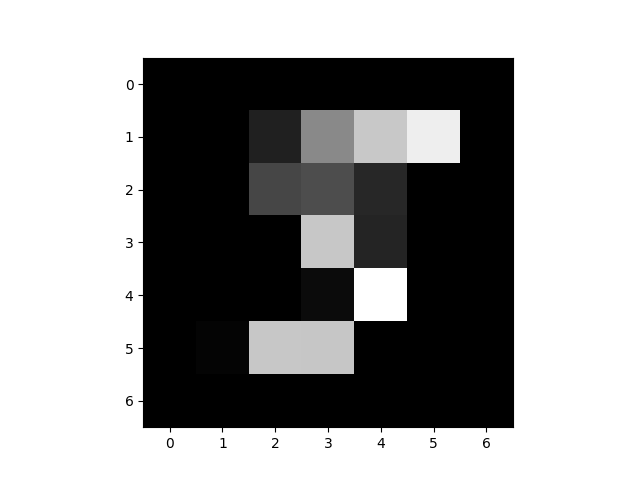

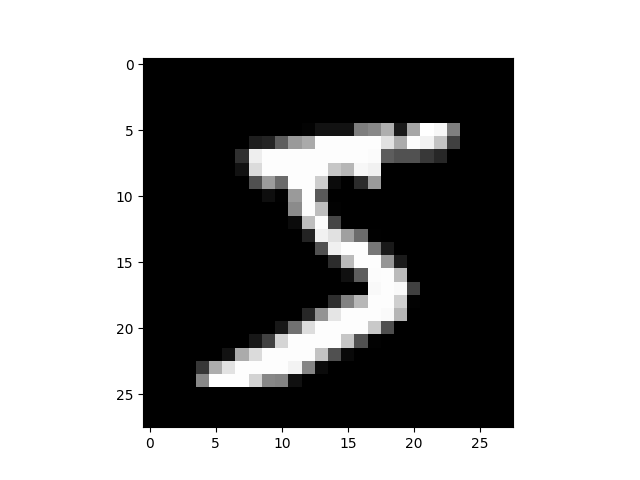

In [8]:
# Here you can see the input data of both 7x7 and 28x28 datasets.

from IPython.display import Image, display

# List of image file paths
image_paths = [
    "/content/RBM_DWave_project/Input_sampleClasssical_RBM_5epochs7x7_50hidden_nodes.png",
    "/content/RBM_DWave_project/Input_sampleClasssical_RBM_5epochs28x28_50hidden_nodes.png"
]

# Display each image in the list
for path in image_paths:
    display(Image(filename=path))

As you can see. The number 5 is much easier to learn and interpretate with 28x28 pixels than 7x7 pixels.